# 处理原始文本

我们怎样才能编写程序访问本地和网络上的文件，从而获得无限的语言材料？

我们如何把文档分割成单独的词和标点符号，这样我们就可以开始像前面章节中在文本语料上做的那样的分析？

我们怎样编程程序产生格式化的输出，并把结果保存在一个文件中？

In [63]:
'''
from __future__ import division
导入python未来支持的语言特征division(精确除法)，当我们没有在程序中导入该特征时，"/"操作符执行的是截断除法(Truncating Division),当我们导入精确除法之后，"/"执行的是精确除法，如下所示：
---------------------------------------------------------------------------------------------
>>> 3/4
0
>>> from __future__ import division
>>> 3/4

0.75

--------------------------------------------------------------------------------------------
导入精确除法后，若要执行截断除法，可以使用"//"操作符：
--------------------------------------------------------------------------------------------
>>> 3//4
0
>>> 
'''
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize

In [39]:
#net
import requests
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = requests.get(url)
raw = response.content.decode('utf-8')
len(raw)

1176965

In [42]:
raw[:900]

u'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Crime and Punishment\r\n\r\nAuthor: Fyodor Dostoevsky\r\n\r\nRelease Date: March 28, 2006 [EBook #2554]\r\nLast Updated: October 27, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\r\n\r\n\r\n\r\n\r\nProduced by John Bickers; and Dagny\r\n\r\n\r\n\r\n\r\n\r\nCRIME AND PUNISHMENT\r\n\r\nBy Fyodor Dostoevsky\r\n\r\n\r\n\r\nTranslated By Constance Garnett\r\n\r\n\r\n\r\n\r\nTRANSLATOR\u2019S PREFACE\r\n\r\nA few words about Dostoevsky himself may help the English reader to\r\nunderstand his work.\r\n\r\nDostoevsky was the son of a doctor. 

In [43]:
#分词
'''
文件中行尾的\r和\n，这是Python 用来显示特殊的回车和换行字符的方式（这个文件一定是在Windows 机器上创建的）。
对于语言处理，我们要将字符串分解为词和标点符号，正如我们在1.中所看到的。
这一步被称为分词，它产生我们所熟悉的结构，一个词汇和标点符号的列表。
'''
tokens = word_tokenize(raw)

In [44]:
type(tokens)

list

In [45]:
tokens[:10]

[u'\ufeffThe',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'Crime',
 u'and',
 u'Punishment',
 u',',
 u'by']

In [46]:
#分词的准备。
text = nltk.Text(tokens)

In [47]:
type(text)

nltk.text.Text

In [48]:
text[1024:1062]

[u'an',
 u'exceptionally',
 u'hot',
 u'evening',
 u'early',
 u'in',
 u'July',
 u'a',
 u'young',
 u'man',
 u'came',
 u'out',
 u'of',
 u'the',
 u'garret',
 u'in',
 u'which',
 u'he',
 u'lodged',
 u'in',
 u'S.',
 u'Place',
 u'and',
 u'walked',
 u'slowly',
 u',',
 u'as',
 u'though',
 u'in',
 u'hesitation',
 u',',
 u'towards',
 u'K.',
 u'bridge',
 u'.',
 u'He',
 u'had',
 u'successfully']

In [49]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


处理文本部分：

requests： 数据获取

Beautiful Soup、re、xpath： 文本处理

feedparser：处理RSS订阅

os：处理本地文件

字符串基本操作在这里请见下图。注：字符串是不可改变的。

![](https://raw.githubusercontent.com/wnma3mz/Nltk_Study/master/imgs/3-2.png)

In [56]:
raw.find("PART I")

190429

In [58]:
raw[190429:190500]

u'PART II\r\n\r\n\r\n\r\nCHAPTER I\r\n\r\nSo he lay a very long while. Now and then h'

In [59]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [61]:
llog['feed']['title']

u'Language Log'

In [62]:
post = llog.entries[2]
post.title

u'Baby talk, part 2'

In [63]:
content = post.content[0].value
content[:50]

u'<p>Two days ago, I was sitting in a Panera around '

In [65]:
import os
os.listdir('.')

['.ipynb_checkpoints', 'day1.ipynb', 'day2.ipynb', 'day3.ipynb']

In [2]:
couplet = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print couplet

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


In [13]:
#re
import re
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [14]:
# 使用正则表达式«ed$»查找以ed结尾的词汇。我们将使用函数re.search(p, s)检查字符串s中是否有模式p。
[w for w in wordlist if re.search('ed$', w)]

[u'abaissed',
 u'abandoned',
 u'abased',
 u'abashed',
 u'abatised',
 u'abed',
 u'aborted',
 u'abridged',
 u'abscessed',
 u'absconded',
 u'absorbed',
 u'abstracted',
 u'abstricted',
 u'accelerated',
 u'accepted',
 u'accidented',
 u'accoladed',
 u'accolated',
 u'accomplished',
 u'accosted',
 u'accredited',
 u'accursed',
 u'accused',
 u'accustomed',
 u'acetated',
 u'acheweed',
 u'aciculated',
 u'aciliated',
 u'acknowledged',
 u'acorned',
 u'acquainted',
 u'acquired',
 u'acquisited',
 u'acred',
 u'aculeated',
 u'addebted',
 u'added',
 u'addicted',
 u'addlebrained',
 u'addleheaded',
 u'addlepated',
 u'addorsed',
 u'adempted',
 u'adfected',
 u'adjoined',
 u'admired',
 u'admitted',
 u'adnexed',
 u'adopted',
 u'adossed',
 u'adreamed',
 u'adscripted',
 u'aduncated',
 u'advanced',
 u'advised',
 u'aeried',
 u'aethered',
 u'afeared',
 u'affected',
 u'affectioned',
 u'affined',
 u'afflicted',
 u'affricated',
 u'affrighted',
 u'affronted',
 u'aforenamed',
 u'afterfeed',
 u'aftershafted',
 u'aftertho

In [15]:
# .通配符匹配任何单个字符。假设我们有一个8 个字母组成的词的字谜室，j是其第三个字母，t是其第六个字母。空白单元格中的每个地方，我们用一个句点：
# 驼字符^匹配字符串的开始，就像$符号匹配字符串的结尾
[w for w in wordlist if re.search('^..j..t..$', w)]

[u'abjectly',
 u'adjuster',
 u'dejected',
 u'dejectly',
 u'injector',
 u'majestic',
 u'objectee',
 u'objector',
 u'rejecter',
 u'rejector',
 u'unjilted',
 u'unjolted',
 u'unjustly']

In [16]:
# 最后，?符合表示前面的字符是可选的。因此«^e-?mail$» 将匹配email和e-mail。
# 我们可以使用sum(1 for w in text if re.search('^e-?mail$', w))计数一个文本中这个词（任一拼写形式）出现的总次数。
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$', w)]

[u'gold', u'golf', u'hold', u'hole']

In [18]:
# 很显然，+简单地表示“前面的项目的一个或多个实例”
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^[ha]+$', w)]

[u'a',
 u'aaaaaaaaaaaaaaaaa',
 u'aaahhhh',
 u'ah',
 u'ahah',
 u'ahahah',
 u'ahh',
 u'ahhahahaha',
 u'ahhh',
 u'ahhhh',
 u'ahhhhhh',
 u'ahhhhhhhhhhhhhh',
 u'h',
 u'ha',
 u'haaa',
 u'hah',
 u'haha',
 u'hahaaa',
 u'hahah',
 u'hahaha',
 u'hahahaa',
 u'hahahah',
 u'hahahaha',
 u'hahahahaaa',
 u'hahahahahaha',
 u'hahahahahahaha',
 u'hahahahahahahahahahahahahahahaha',
 u'hahahhahah',
 u'hahhahahaha']

In [89]:
# 现在让我们用*替换+，它表示“前面的项目的零个或多个实例”。
# 正则表达式«^m*i*n*e*$»将匹配所有我们用«^m+i+n+e+$»找到的，
# 同时包括其中一些字母不出现的词汇，例如，me, min和mmmmm。
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[8-9]+\.[5-9]+$', w)]

[u'8.5',
 u'8.55',
 u'8.56',
 u'8.575',
 u'8.65',
 u'8.75',
 u'8.9',
 u'89.7',
 u'89.9',
 u'9.5',
 u'9.75',
 u'9.8',
 u'9.9']

In [26]:
# {n}出现n次、{n,}匹配最少出现n次、{n,m}匹配最少出现n次，最多出现m次
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]

[u'10-day',
 u'10-lap',
 u'10-year',
 u'100-share',
 u'12-point',
 u'12-year',
 u'14-hour',
 u'15-day',
 u'150-point',
 u'190-point',
 u'20-point',
 u'20-stock',
 u'21-month',
 u'237-seat',
 u'240-page',
 u'27-year',
 u'30-day',
 u'30-point',
 u'30-share',
 u'30-year',
 u'300-day',
 u'36-day',
 u'36-store',
 u'42-year',
 u'50-state',
 u'500-stock',
 u'52-week',
 u'69-point',
 u'84-month',
 u'87-store',
 u'90-day']

In [27]:
[w for w in wsj if re.search('(ed|ing)$', w)]

[u'62%-owned',
 u'Absorbed',
 u'According',
 u'Adopting',
 u'Advanced',
 u'Advancing',
 u'Alfred',
 u'Allied',
 u'Annualized',
 u'Anything',
 u'Arbitrage-related',
 u'Arbitraging',
 u'Asked',
 u'Assuming',
 u'Atlanta-based',
 u'Baking',
 u'Banking',
 u'Beginning',
 u'Beijing',
 u'Being',
 u'Bermuda-based',
 u'Betting',
 u'Boeing',
 u'Broadcasting',
 u'Bucking',
 u'Buying',
 u'Calif.-based',
 u'Change-ringing',
 u'Citing',
 u'Concerned',
 u'Confronted',
 u'Conn.based',
 u'Consolidated',
 u'Continued',
 u'Continuing',
 u'Declining',
 u'Defending',
 u'Depending',
 u'Designated',
 u'Determining',
 u'Developed',
 u'Died',
 u'During',
 u'Encouraged',
 u'Encouraging',
 u'English-speaking',
 u'Estimated',
 u'Everything',
 u'Excluding',
 u'Exxon-owned',
 u'Faulding',
 u'Fed',
 u'Feeding',
 u'Filling',
 u'Filmed',
 u'Financing',
 u'Following',
 u'Founded',
 u'Fracturing',
 u'Francisco-based',
 u'Fred',
 u'Funded',
 u'Funding',
 u'Generalized',
 u'Germany-based',
 u'Getting',
 u'Guaranteed',
 u'H

In [34]:
# r'': 一般用在正则表达式中，称为原始字符串，作用是将Python语法中的反斜杠转义给取消，将其设置成为一个普通的字符串。
# 获取语料库数据 进行压缩
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)

In [29]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')

In [36]:
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


In [38]:
# 正则结合条件频率，提取辅音-元音序列
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
cvs = [cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]', w)]

In [39]:
cfd = nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


In [49]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [87]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [51]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]

# 词干提取

In [59]:
# nltk自带的词干提取器
# 索引一些文本和使搜索支持不同词汇形式的话，使用Porter词干提取器
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [60]:
# 编译一些文本的词汇或想要一个有效词条（或中心词）列表，使用WordNet词形归并器
wnl = nltk.WordNetLemmatizer()

# 分词和分割

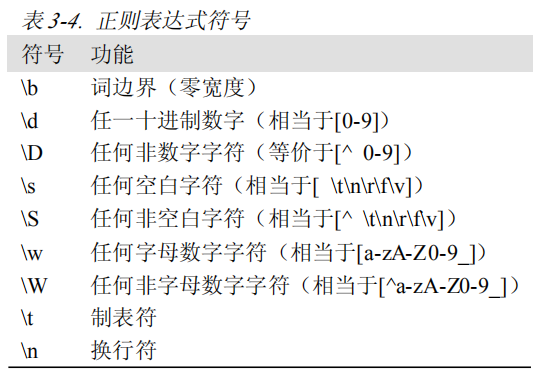

In [81]:
#函数 nltk.regexp_tokenize()与 re.findall()类似（我们一直在使用它进行分词）。然
# 而，nltk.regexp_tokenize()分词效率更高，且不需要特殊处理括号。

# * 前面的字符的0or多次
# + 前面的一次或多次
# ? 前面的表达式的0or多次
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r"""(?x)                   # set flag to allow verbose regexps
              (?:[A-Z]\.)+           # abbreviations, e.g. U.S.A.
              |\d+(?:\.\d+)?%?       # numbers, incl. currency and percentages
              |\w+(?:[-']\w+)*       # words w/ optional internal hyphens/apostrophe
              |\.\.\.                # ellipsis
              |(?:[.,;"'?():-_`])    # special characters with meanings
            """
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '12.40', '...']

In [93]:
# 分割 断句
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents =nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

[u'"Nonsense!"',
 u'said Gregory, who was very rational when anyone else\nattempted paradox.',
 u'"Why do all the clerks and navvies in the\nrailway trains look so sad and tired, so very sad and tired?',
 u'I will\ntell you.',
 u'It is because they know that the train is going right.',
 u'It\nis because they know that whatever place they have taken a ticket\nfor that place they will reach.',
 u'It is because after they have\npassed Sloane Square they know that the next station must be\nVictoria, and nothing but Victoria.',
 u'Oh, their wild rapture!',
 u'oh,\ntheir eyes like stars and their souls again in Eden, if the next\nstation were unaccountably Baker Street!"',
 u'"It is you who are unpoetical," replied the poet Syme.']


现在分词的任务变成了一个搜索问题：找到将文本字符串正确分割成词汇的字位串。
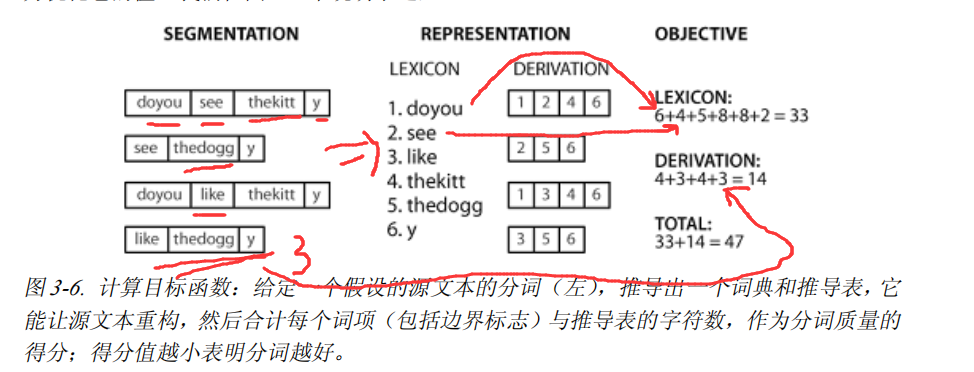

In [94]:
def segment(text, segs):
    words = []
    last = 0
    for i in range(len(segs)):
        if segs[i] == '1':
            words.append(text[last:i+1])
            last = i+1
    words.append(text[last:])
    return words

In [96]:
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg2 = "0100100100100001001001000010100100010010000100010010000"
segment(text,seg2)

['do',
 'you',
 'see',
 'the',
 'kitty',
 'see',
 'the',
 'doggy',
 'do',
 'you',
 'like',
 'the',
 'kitty',
 'like',
 'the',
 'doggy']

In [101]:
def evaluate(text, segs):
    words = segment(text, segs)
    text_size = len(words)
    lexicon_size = len(' '.join(list(set(words))))
#     print text_size
    return text_size + lexicon_size

In [102]:
seg3 = "0000100100000011001000000110000100010000001100010000001"
evaluate(text, seg3)

46

最后一步是寻找最大化目标函数值的 0 和 1 的模式，例 3-4 中所示。请注意，最好的分
词包括像“thekitty”这样的“词”，因为数据中没有足够的证据进一步分割这个词

例 3-4. 使用模拟退火算法的非确定性搜索：一开始仅搜索短语分词；随机扰动 0 和 1，
它们与“温度”成比例；每次迭代温度都会降低，扰动边界会减少

有了足够的数据，就可能以一个合理的准确度自动将文本分割成词汇。这种方法可用于
为那些词的边界没有任何视觉表示的书写系统分词

中文区别：分词 词集

LDA 聚类

RNN 句子关系

CNN 文本分类

动态规划的考核